# This Notebook is available to represent the Data preprocessing pipeline utilized before the ML approaches

## Data Quality Check

+ P01 : fs was 40 -> ``segment_len_threshold = 100`` , `distance = 400` -> a bit shifted in speed

**changed fs to 100 from P02-P15**
+ P02 -> All segmented by ``segment_len_threshold = 100`` , `distance = 400`

+ P03 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P04 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P05 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P06 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P07 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P08 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P09 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P10 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P11 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P12 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P13 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P14 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`
+ P15 -> All corrected by ``segment_len_threshold = 200`` , `distance = 500`

In [548]:
from pre_processing.pre_processing_utils import *
from toolbox import Protocol
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [549]:
base_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Final_Measurements/P02"

In [550]:
protocol = Protocol(base_dir)

Loaded protocol file: /Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Final_Measurements/P02/Participant_P02_protocol.json
{'participant': {'Number': 'P02', 'age': '22', 'gender': 'female', 'leg': 'right'}, 'isokinetic_measurement': {'rotation_velocity': '30 °/s', 'force_levels': '[20 20 60 60 40 40 70 70 30 30 80 80 50 50]'}, 'eit_measurement': {'excitation_frequency': 125000, 'burst_count': 0, 'amplitude': '1 mA', 'frame_rate': 40, 'n_el': 16, 'injection_skip': 5}, 'notes': 'Lever Arm: 29 cm'}


# Step 1: Extract the torque, postion, speed data from `.txt` file generated by isoforce device. First stage is to extract essential data and stored them in DataFrame 

In [551]:
iso_raw_DF = generate_DF(file_path=base_dir)


Cleaned data saved to /Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Final_Measurements/P02/iso_raw_data.csv


## Plot the Torque , Speed, Angle from isoforce DF

Applying low-pass filter to torque and angle data.


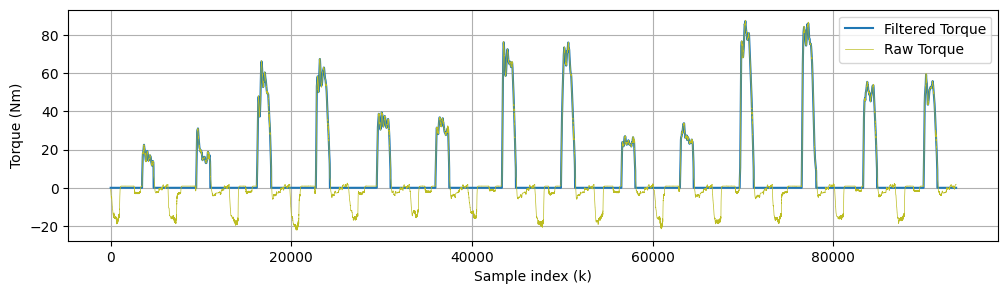

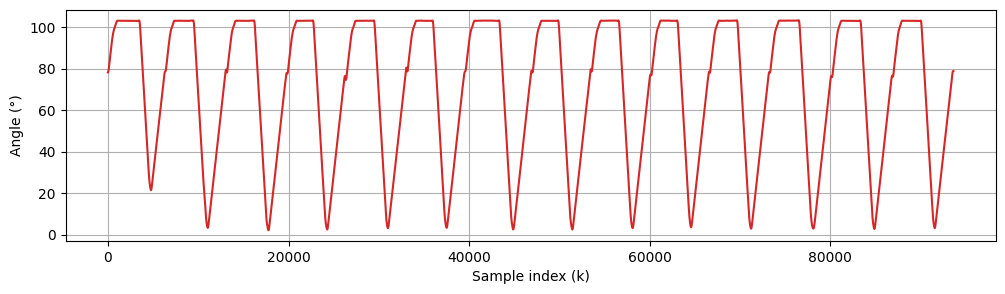

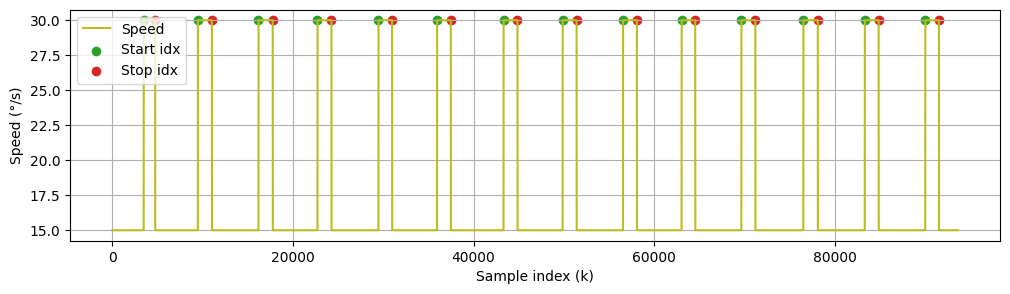

In [552]:
isoforce_iso = IsoForceRAW(iso_raw_DF, LP_filter_enabled=True, Protocol=protocol)
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_speed()

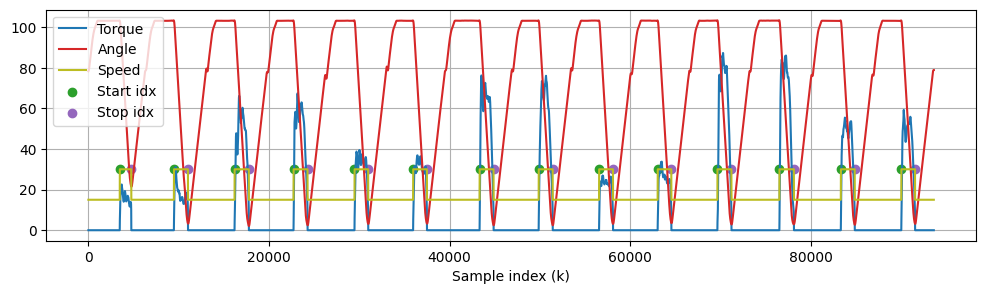

In [553]:
isoforce_iso.plot_data()


## Plot segmented Torque and angle from isoforce DF

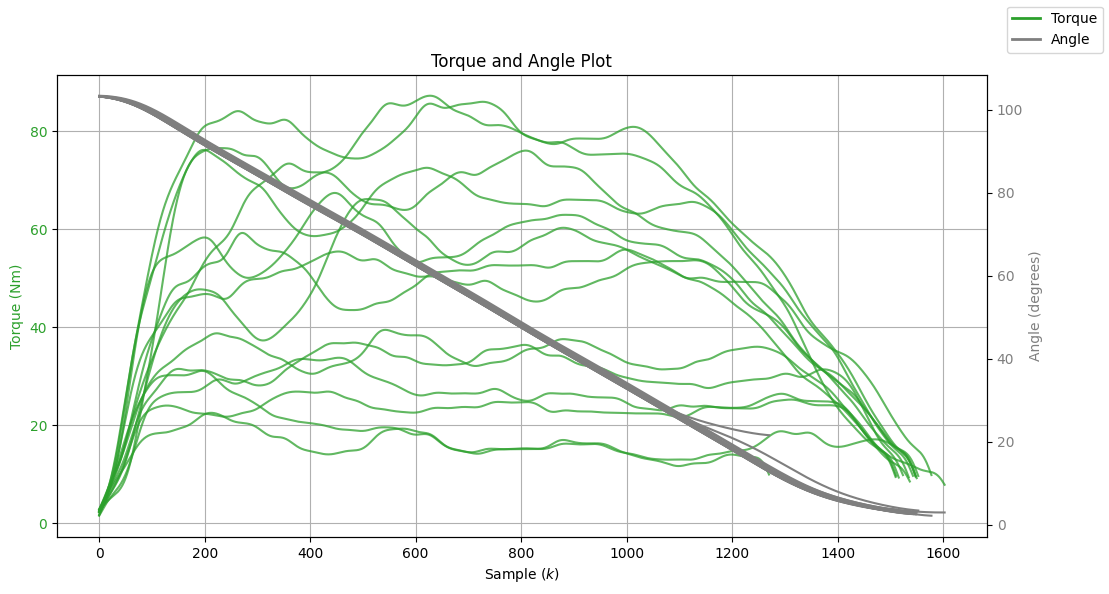

In [554]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_iso.torque_segments.keys())):
    ax1.plot(isoforce_iso.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_iso.angle_segments.keys())):
    ax2.plot(isoforce_iso.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


# Isoforce Data Acquisition from NI Chip

The NI chip is equipped with three channels: P, T, and S. Each channel is associated with specific measurement parameters, including a factor and offset, as detailed below:

- **Channel 1 (P):** Angle  
  - Factor: 54  
  - Offset: 12  

- **Channel 2 (T):** Torque  
  - Factor: 150  
  - Offset: 25  

- **Channel 3 (S):** Speed  
  - Factor: 108  
  - Offset: -3  


## the distace of peak detection was decreased to 400 to extract all torque segements

In [555]:
isoforce_py = IsoForcePy(base_dir, Protocol=protocol, LP_filter_enabled=True, over_UTC=False, scale_0_1=True, segment_len_threshold=100, distance=500)


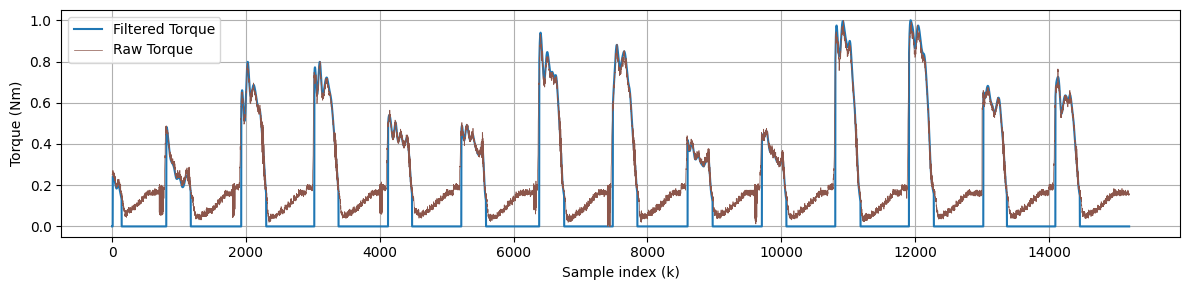

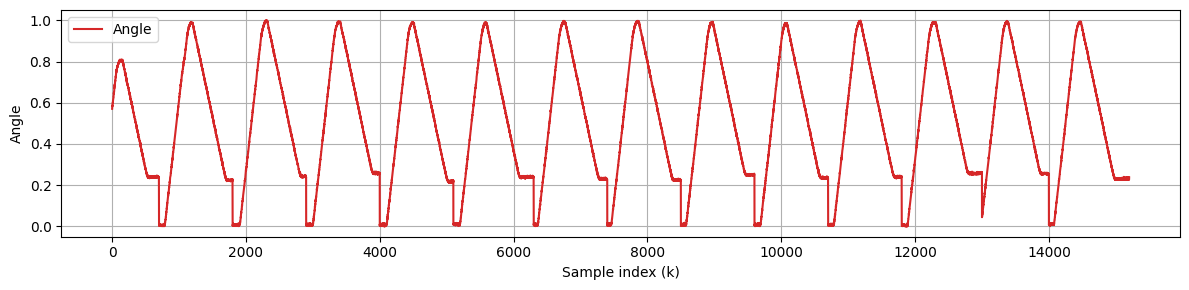

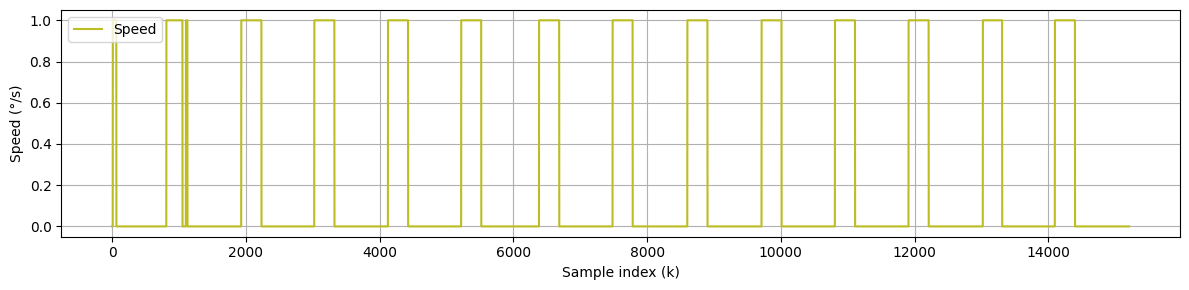

In [556]:
isoforce_py.plot_torque()
isoforce_py.plot_angle()
isoforce_py.plot_speed()


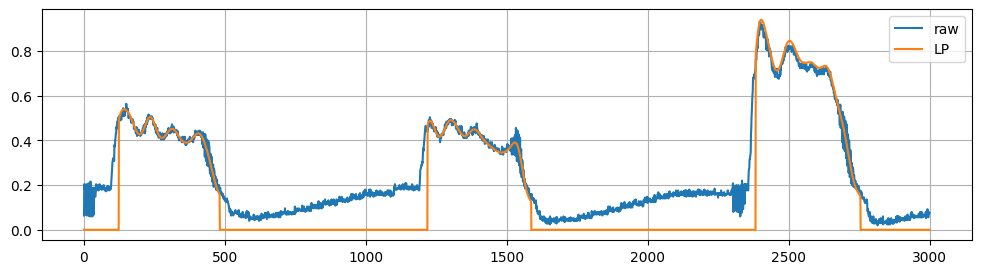

In [557]:
plt.figure(figsize=(12, 3))
plt.plot((isoforce_py.torque_raw[4000:7000]), label="raw")
plt.plot((isoforce_py.torque[4000:7000]), label="LP")
plt.legend()
plt.grid()

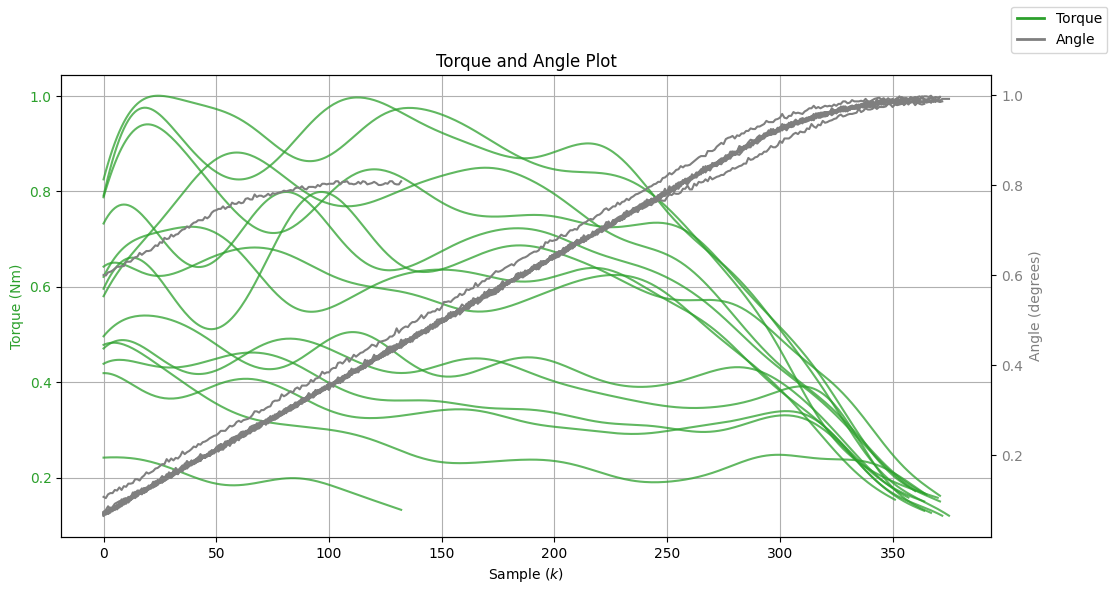

In [558]:
from matplotlib.lines import Line2D
fig, ax1 = plt.subplots(figsize=(12,6)) 

# Plot Torque on the primary y-axis
for idx in range(len(isoforce_py.torque_segments.keys())):
    ax1.plot(isoforce_py.torque_segments[f"T_seg_{idx}"], "C2", alpha=0.75)

ax1.set_xlabel("Sample ($k$)")
ax1.set_ylabel("Torque (Nm)", color="C2")
ax1.tick_params(axis="y", labelcolor="C2")
ax1.grid()

# Create a second y-axis for Angle
ax2 = ax1.twinx()  
for idx in range(len(isoforce_py.angle_segments.keys())):
    ax2.plot(isoforce_py.angle_segments[f"A_seg_{idx}"], "C7")

ax2.set_ylabel("Angle (degrees)", color="C7")
ax2.tick_params(axis="y", labelcolor="C7")

custom_lines = [
    Line2D([0], [0], color="C2", lw=2, label="Torque"),
    Line2D([0], [0], color="C7", lw=2, label="Angle")
]
fig.legend(handles=custom_lines, loc="upper right")


plt.title("Torque and Angle Plot")
plt.show()


## Synchronization between `IsoForceRaw` and `IsoForcePy`

In [559]:
#isoforce_iso.torque_segments.pop(next(iter(isoforce_iso.torque_segments)))
len(isoforce_iso.torque_segments.keys()), len(isoforce_py.torque_segments.keys())



(14, 14)

In [560]:
from scipy.signal import resample


def resample_signals(iso_iso, iso_py, target_length=None):
    iso_iso = np.asarray(iso_iso)
    iso_py = np.asarray(iso_py)
    if target_length:
        print(f"Resample both signals to a length of {target_length} samples.")
        iso_py = resample(iso_py, num=target_length)
        iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py
    else:
        target_length = max(len(iso_iso), len(iso_py))
        print(f"Resample both signals to a length of {target_length} samples.")
        if len(iso_iso) > len(iso_py):
            iso_py = resample(iso_py, num=target_length)
        elif len(iso_py) > len(iso_iso):
            iso_iso = resample(iso_iso, num=target_length)
        return iso_iso, iso_py


def detect_shift(signal1, signal2):
    N = max(len(signal1), len(signal2))
    corr = np.correlate(signal1, signal2, mode="full")
    lags = np.arange(-N + 1, N)

    max_corr_idx = np.argmax(corr)
    discrete_time_shift = lags[max_corr_idx]
    print(f"Discrete time shift of {discrete_time_shift}.")
    return discrete_time_shift

Resample both signals to a length of 1544 samples.
Discrete time shift of 83.


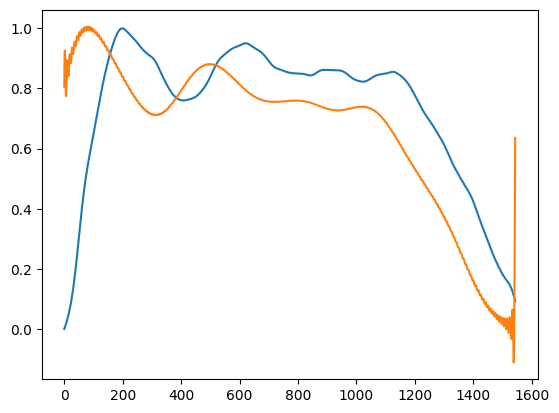

In [561]:
iso_seg_1 = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{6}"])
py_seg_1 = scale_to_range(isoforce_py.torque_segments[f"T_seg_{6}"])
iso_seg_corr, py_seg_corr = resample_signals(iso_seg_1, py_seg_1)

plt.plot(iso_seg_corr, label="iso")
plt.plot(py_seg_corr, label="py")

shift = detect_shift(iso_seg_corr, py_seg_corr)

Resample both signals to a length of 1271 samples.
Discrete time shift of 64.
Resample both signals to a length of 1500 samples.


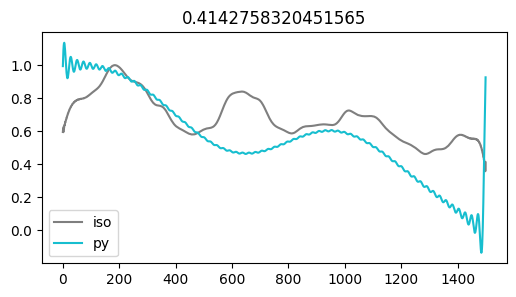

Resample both signals to a length of 1554 samples.
Discrete time shift of 61.
Resample both signals to a length of 1500 samples.


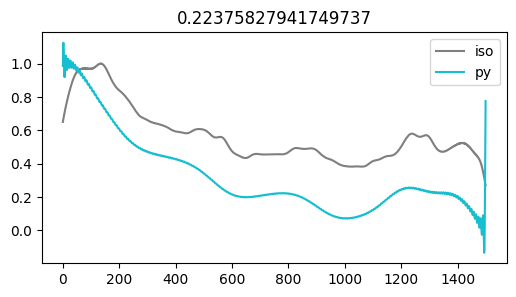

Resample both signals to a length of 1579 samples.
Discrete time shift of 95.
Resample both signals to a length of 1500 samples.


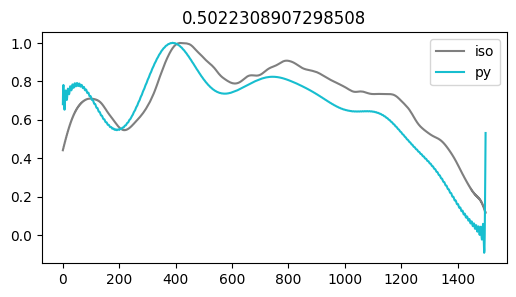

Resample both signals to a length of 1549 samples.
Discrete time shift of 71.
Resample both signals to a length of 1500 samples.


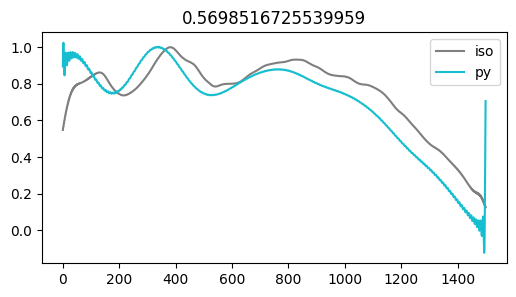

Resample both signals to a length of 1511 samples.
Discrete time shift of 75.
Resample both signals to a length of 1500 samples.


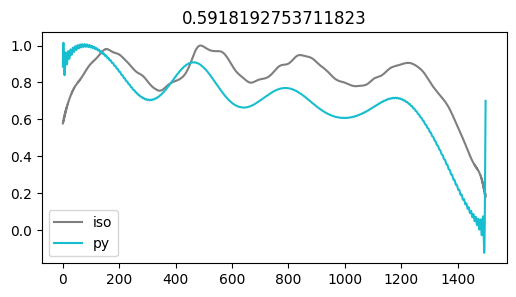

Resample both signals to a length of 1525 samples.
Discrete time shift of 77.
Resample both signals to a length of 1500 samples.


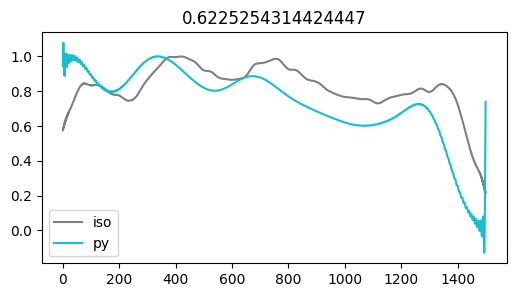

Resample both signals to a length of 1544 samples.
Discrete time shift of 83.
Resample both signals to a length of 1500 samples.


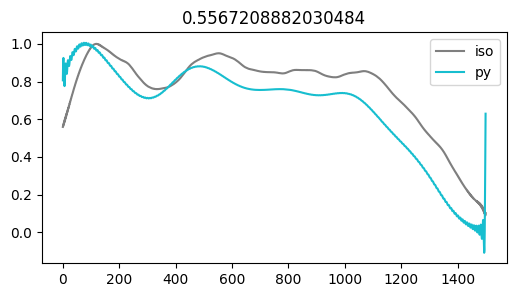

Resample both signals to a length of 1549 samples.
Discrete time shift of 95.
Resample both signals to a length of 1500 samples.


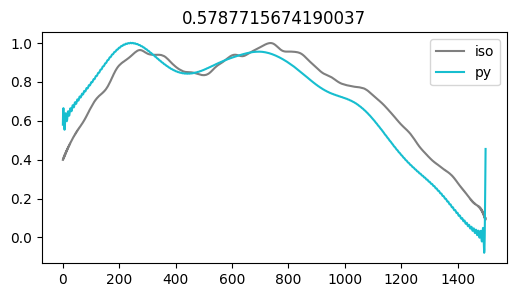

Resample both signals to a length of 1538 samples.
Discrete time shift of 72.
Resample both signals to a length of 1500 samples.


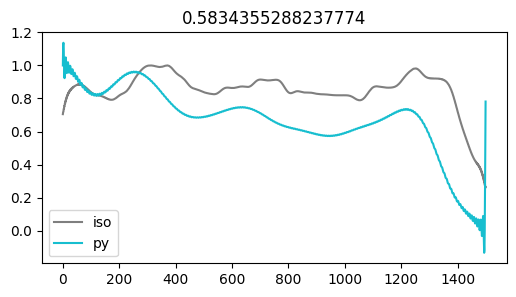

Resample both signals to a length of 1512 samples.
Discrete time shift of 82.
Resample both signals to a length of 1500 samples.


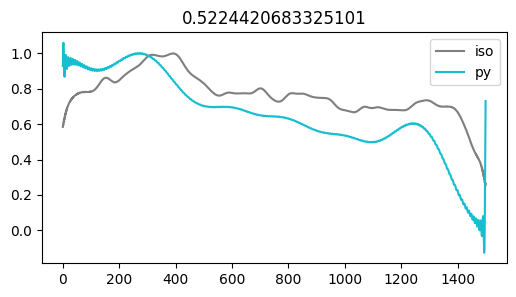

Resample both signals to a length of 1551 samples.
Discrete time shift of 111.
Resample both signals to a length of 1500 samples.


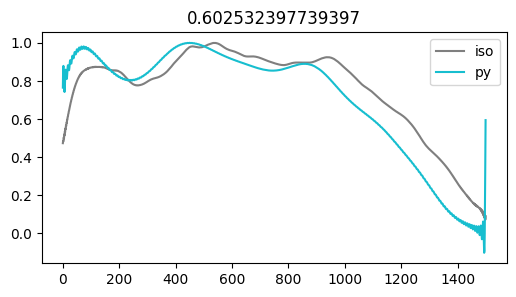

Resample both signals to a length of 1604 samples.
Discrete time shift of 76.
Resample both signals to a length of 1500 samples.


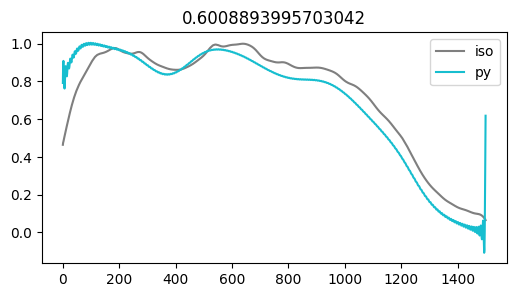

Resample both signals to a length of 1536 samples.
Discrete time shift of 73.
Resample both signals to a length of 1500 samples.


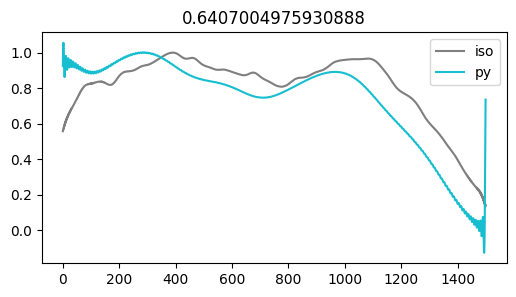

Resample both signals to a length of 1517 samples.
Discrete time shift of 88.
Resample both signals to a length of 1500 samples.


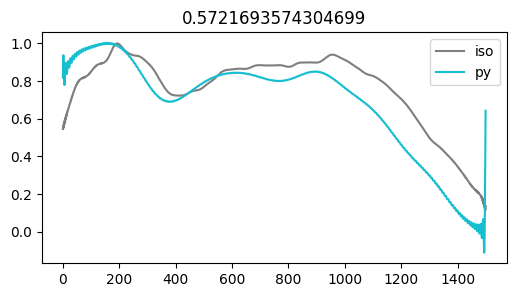

In [562]:
# Get the number of segments in each dictionary
num_iso_segments = len(isoforce_iso.torque_segments)
num_py_segments = len(isoforce_py.torque_segments)

# Remove the first segment from the dictionary with more elements
if num_iso_segments > num_py_segments:
    first_key_iso = next(iter(isoforce_iso.torque_segments))
    del isoforce_iso.torque_segments[first_key_iso]
elif num_py_segments > num_iso_segments:
    first_key_py = next(iter(isoforce_py.torque_segments))
    del isoforce_py.torque_segments[first_key_py]

# Now both dictionaries have equal number of segments
min_segments = min(len(isoforce_iso.torque_segments), len(isoforce_py.torque_segments))

# Process the segments
for idx in range(min_segments):
    # Scale the amplitude range to [0,1]
    iso_seg = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{idx}"])
    py_seg = scale_to_range(isoforce_py.torque_segments[f"T_seg_{idx}"])
    
    # Create two signals of the same length and compute the phase shift
    iso_seg_corr, py_seg_corr = resample_signals(iso_seg, py_seg)
    shift = detect_shift(iso_seg_corr, py_seg_corr)
    
    # Resample the original, amplitude-scaled signals to a constant length
    iso_seg, py_seg = resample_signals(iso_seg[shift:], py_seg, target_length=1500)

    # Plot results
    plt.figure(figsize=(6, 3))
    plt.title(np.correlate(iso_seg, py_seg)[0] / len(iso_seg))
    plt.plot(iso_seg, "C7", label="iso")
    plt.plot(py_seg, "C9", label="py")
    plt.legend()
    plt.show()


In [563]:
for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    print("from", isoforce_py.time[start], "to", isoforce_py.time[stop])
    print("Δt", isoforce_py.time[stop] - isoforce_py.time[start])

from 9 to 142
Δt 133
from 810 to 1175
Δt 365
from 1930 to 2302
Δt 372
from 3022 to 3383
Δt 361
from 4124 to 4482
Δt 358
from 5219 to 5587
Δt 368
from 6383 to 6755
Δt 372
from 7483 to 7849
Δt 366
from 8601 to 8974
Δt 373
from 9711 to 10076
Δt 365
from 10808 to 11184
Δt 376
from 11909 to 12280
Δt 371
from 13020 to 13372
Δt 352
from 14097 to 14462
Δt 365


## EIT & Isoforce Analysis

In [564]:
# raw EIT data

import glob

EIT_path = "/Users/MA_Arash/EIT_Thigh_Force_Measurement/Final_Measurement/P12/eit_raw/20250225 17.00.37/processed"
EIT_files = glob.glob(f"{EIT_path}/setup_*.npz")  # Ensures correct file pattern

print(len(EIT_files))  # Check if files are found


0


In [565]:
eit = list()
eit_timestmps = list()

for ele in np.sort(EIT_files):
    tmp = np.load(ele, allow_pickle=True)
    eit.append(tmp['eit'])
    eit_timestmps.append(tmp['timestamp'])

eit = np.array(eit)
eit_abs = np.abs(eit)
time_stmp = np.array(eit_timestmps)



### check the timestamps between EIT and isoforce recorded by NI

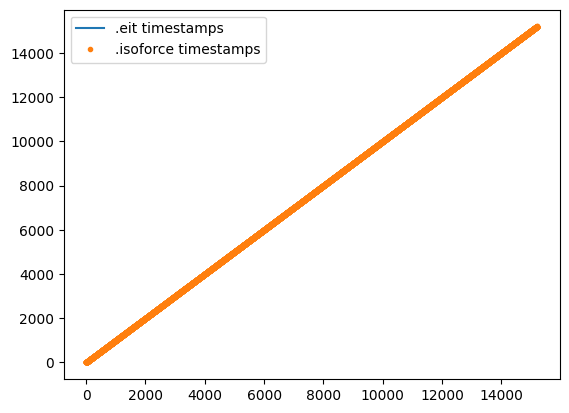

In [566]:
# Raw Isoforce
iso_timestmps = isoforce_py.time

plt.plot(eit_timestmps, eit_timestmps,"-", label=".eit timestamps")
plt.plot(iso_timestmps, iso_timestmps, ".", label=".isoforce timestamps")
plt.legend()
plt.show()


### PCA Analysis

In [567]:
from sklearn.decomposition import PCA

data_flattened = eit_abs.reshape(eit_abs.shape[0], -1)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_flattened)

plt.scatter(data_reduced[:, 0],
            data_reduced[:, 1],
            c=scale_to_range(eit_timestmps),
            edgecolors="k",
            alpha=0.7)
plt.xlabel("1. PC", fontsize=12)
plt.ylabel("2. PC", fontsize=12)
plt.show()

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

# Corresponding EIT values

In [ ]:
EIT_segments = list()
isoforce_unix_time = np.array([t.timestamp() for t in isoforce_py.time])

for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    start_time = isoforce_unix_time[start]
    stop_time = isoforce_unix_time[stop]
    
    # Find closest indices in EIT time array
    start_idx = np.argmin(np.abs(eit_timestmps - start_time))
    stop_idx = np.argmin(np.abs(eit_timestmps - stop_time))
    EIT_segments.append(eit_abs[start_idx:stop_idx+1, :, :])

    

In [ ]:
print(f"EIT segment time shape: {len(eit_segment_time)}")
print(f"EIT mean conductivity shape: {len(mean_conductivity)}")


EIT segment time shape: 330
EIT mean conductivity shape: 133


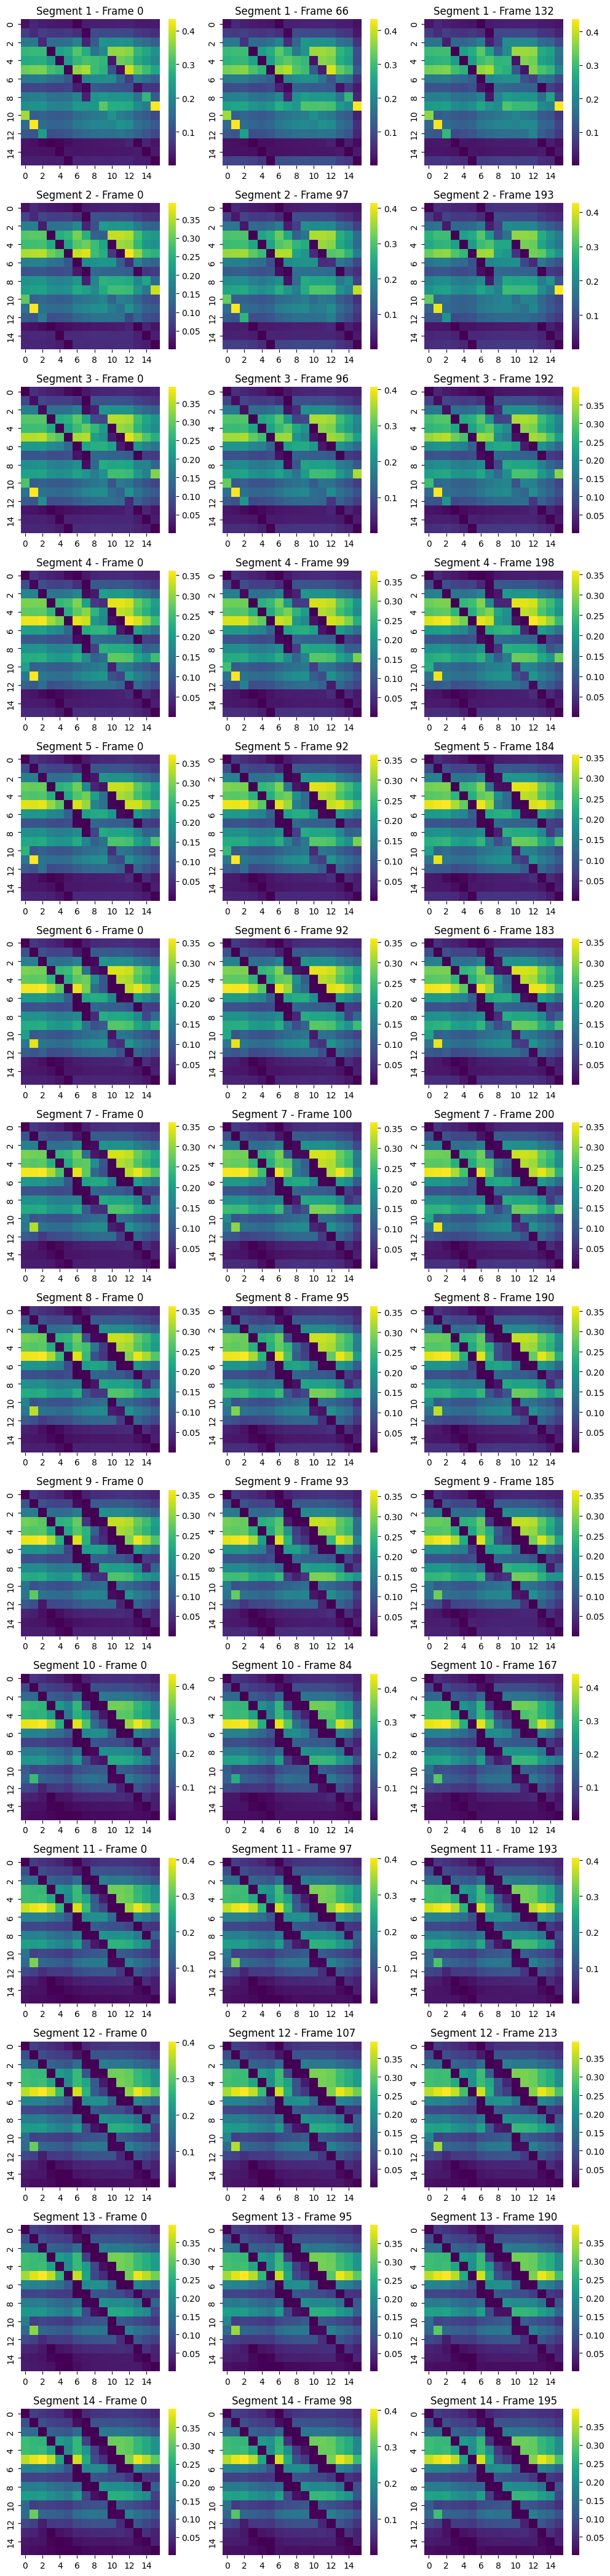

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(len(EIT_segments), 3, figsize=(10, len(EIT_segments) * 3))

for i, segment in enumerate(EIT_segments):
    N = segment.shape[0]
    frames = [0, N//2, N-1]  # Start, Middle, End frames

    for j, frame_idx in enumerate(frames):
        sns.heatmap(segment[frame_idx, :, :], ax=axes[i, j], cmap="viridis", cbar=True)
        axes[i, j].set_title(f"Segment {i+1} - Frame {frame_idx}")

plt.tight_layout()
plt.show()
